### Electronics Sales Data Analysis

Use of Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

In [1]:
# Import necessary libraries
import pandas as pd
import os


#### Merging 12 months of sales data into a single file 

In [3]:
file_path = './Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
# df = pd.read_csv(file_path +'/Sales_April_2019.csv')

files = [file for file in os.listdir(file_path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()  # Empty dataframe

for file in files:
    df = pd.read_csv(file_path+'/'+file)
    all_months_data = pd.concat([all_months_data, df])


In [10]:
all_months_data.to_csv(file_path +'/all_data.csv', index = False)

In [4]:
# Load the merged data
all_data = pd.read_csv(file_path + '/all_data.csv')

In [5]:
# View the data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data

In [6]:
# Let's review how may data points are NaN or empty
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# There are 545 rows have NaN / empty cells

In [8]:
# Let's create dataframe with empty / NaN values.
df_NaN = all_data[all_data.isna().any(axis = 1)]
df_NaN.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#  We need to drop NaN / Empty rows
all_data = all_data.dropna(axis = 0)
all_data = all_data.reset_index(drop = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find the 'Or' and delete them

In [10]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# Create a month column with two digits
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [12]:
# Create a month column, and Convert the month data into numeric values
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Convert columns to numeric data types

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Add a sales column

In [14]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Best month for sales and how much was earned in that month

In [16]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [17]:
# Let's visualize
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, results['Sales'], color = 'y' )
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.title('Sales over the Months of the Year')
plt.show()

<Figure size 640x480 with 1 Axes>

#### What US city has the highest number of sales

#### Add a City / State column

In [18]:
# Let's use apply()
# We could perform this thru a function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# all_data = all_data.drop('City', axis = 1, inplace = True)
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ',' + ' ' + get_state(x))
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)}' + ',' + ' ' + f'{get_state(x)}')
# Directly w/o a function
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]+ ', ' + x.split(',')[2].split(' ')[1]) 

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [25]:
results_US_Cities = all_data.groupby('City').sum()
results_US_Cities

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


In [26]:
# cities = all_data['City'].unique()
# cities

In [27]:
# Let's visualize
# import matplotlib.pyplot as plt
# cities = all_data['City'].unique()
# plt.bar(cities, results_US_Cities['Sales'] ) 
# plt.xticks(cities, rotation = 'vertical', size = 8 )
# plt.ylabel('Sales in USD ($)')
# plt.xlabel('Cities')
# plt.title('Sales for Cities of the Year')
# plt.show()

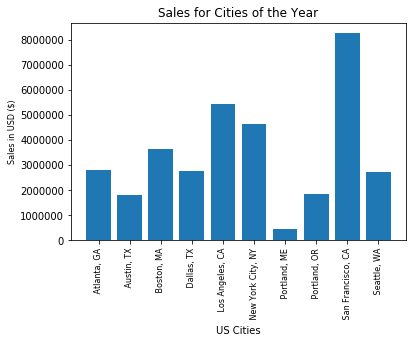

In [28]:
# Let's visualize
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, results_US_Cities['Sales'] )
plt.xticks(cities, rotation = 'vertical', fontsize = 8)
plt.ylabel('Sales in USD ($)', fontsize = 8)
plt.xlabel('US Cities')
plt.title('Sales for Cities of the Year')
plt.show()

 Observations From above graph:
 1. San Francisco, CA has the highest electronics sales understandbly, may be they need more electronics, may be they have better advertisements
 2. Portland, ME has the lowest sales, may be it's a smaller population, less advertisements

### What time should we display advertisements to maximize likelihood of customer's buying products

In [29]:
all_data.head()
all_data.shape

(185950, 9)

In [30]:
# Convert Order Date to Date Time column
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [31]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


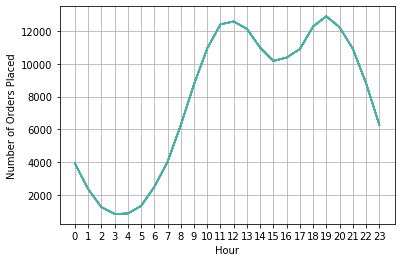

In [33]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders Placed')
plt.show()
# all_data.groupby('Hour').count()

### Observation: 11 am and 7 pm people buy place the order the most.
1. It would make more sense to advertise before and around 11 am and 7 pm

### What products are most often sold together?

In [34]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]  

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# Example:
# (from itertools import combinations
# from collections import Counter

# list3 = [[2, 3], [2, 3, 4]]

# count = Counter()

# for sublist in list3:
#     count.update(Counter(combinations(sublist, 2)))

# print(count))

# Import libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
# print(count)
    
for key, values in count.most_common(10):
    print(key, values)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


As a promotion as a smart deal, the business could group the Lightning Charging Cable with the iPhones to maximize the revenue, and the same with the other pairs

### What product sold the most? Why do you think it sold the most

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [37]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


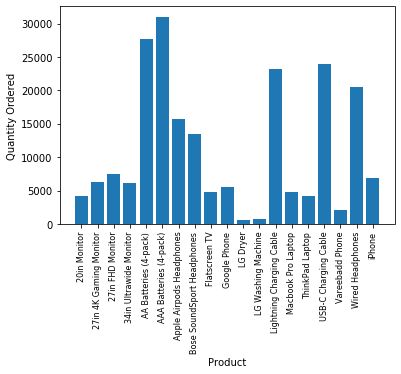

In [38]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

In [39]:
# Average price of each product
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

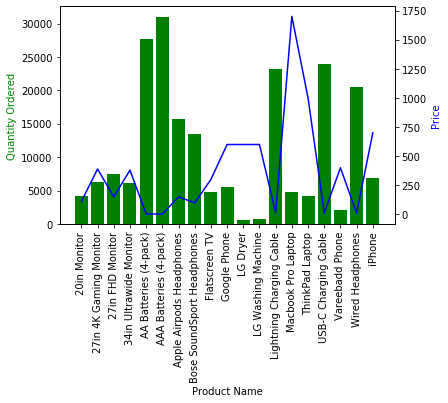

In [40]:
# Overlay the price over the quantity ordered
# https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()

Conclusions:
1. From the chart above it shows that the cheaper product sold the most
2. MacbookPro Labtop sold more than the washing machine even though the labtops are more expensive because of the more users (students, corporations, etc.)